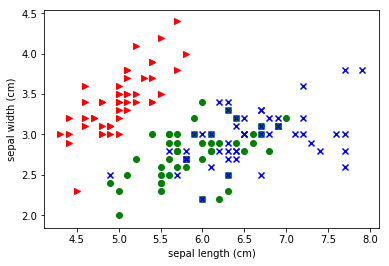

In [21]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()
features = data.data
feature_names =  data.feature_names
target = data.target
target_name = data.target_names
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
for t in range(3):
    if t==0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker = 'o'
    elif t==2:
        c='b'
        marker='x'
    plt.scatter(features[target == t,0],
                features[target==t,1],
                marker=marker,
                c=c)

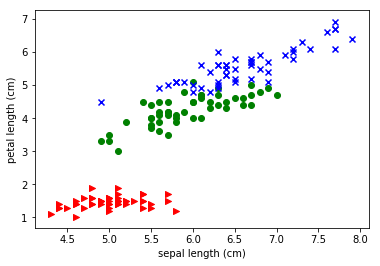

In [22]:
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[2])
for t in range(3):
    if t==0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker = 'o'
    elif t==2:
        c='b'
        marker='x'
    plt.scatter(features[target == t,0],
                features[target==t,2],
                marker=marker,
                c=c)

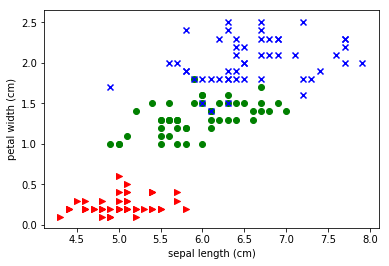

In [23]:
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])
for t in range(3):
    if t==0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker = 'o'
    elif t==2:
        c='b'
        marker='x'
    plt.scatter(features[target == t,0],
                features[target==t,3],
                marker=marker,
                c=c)

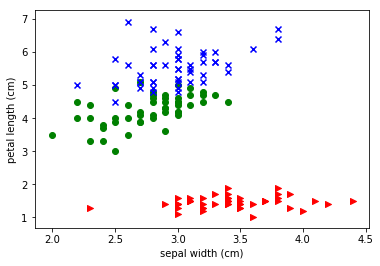

In [24]:
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
for t in range(3):
    if t==0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker = 'o'
    elif t==2:
        c='b'
        marker='x'
    plt.scatter(features[target == t,1],
                features[target==t,2],
                marker=marker,
                c=c)

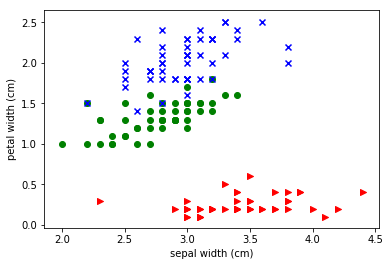

In [25]:
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[3])
for t in range(3):
    if t==0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker = 'o'
    elif t==2:
        c='b'
        marker='x'
    plt.scatter(features[target == t,1],
                features[target==t,3],
                marker=marker,
                c=c)

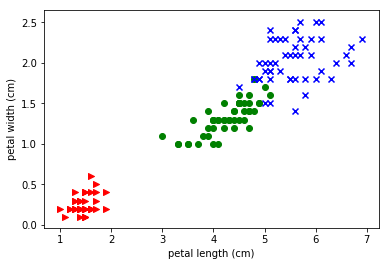

In [26]:
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
for t in range(3):
    if t==0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker = 'o'
    elif t==2:
        c='b'
        marker='x'
    plt.scatter(features[target == t,2],
                features[target==t,3],
                marker=marker,
                c=c)

In [27]:
labels = target_name[target]
plength = features[:,2]
is_setosa = (labels == 'setosa')
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))

Maximum of setosa: 1.9.


In [28]:
print('Minimum of others: {0}.'.format(min_non_setosa))

Minimum of others: 3.0.


In [29]:
is_setosa = (labels == 'setosa')
features = features[~is_setosa]
labels = labels[~is_setosa]
is_virginica = (labels == 'virginica')

best_acc = -1.0
for fi in range(features.shape[1]):
    thresh = features[:,fi]
    for t in thresh:
        features_i = features[:,fi]
        pred = (features_i >t)
        acc = (pred==is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
        
        if acc>best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

            



In [30]:
def is_verginica_test(fi,t,reverse,example):
    test = example[fi]>t
    if reverse:
        test = not test
    return test

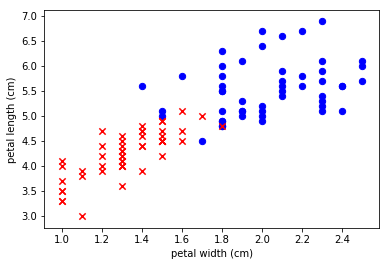

In [31]:
plt.xlabel(feature_names[3])
plt.ylabel(feature_names[2])
f0 , f1 = 3 , 2
plt.scatter(features[is_virginica, f0],
            features[is_virginica, f1], c='b', marker='o', s=40)
plt.scatter(features[~is_virginica, f0],
            features[~is_virginica, f1], c='r', marker='x', s=40)

In [32]:
from threshold import fit_model, predict
correct = 0.0

for ei in range(len(features)):
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions == is_virginica[testing])
acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%


In [34]:
from load import load_dataset

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
classifier = KNeighborsClassifier(n_neighbors=1)

In [37]:
from sklearn.cross_validation import KFold

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
kf = KFold(len(features), n_folds=5, shuffle=True)
means = []
for training,testing in kf:
   classifier.fit(features[training], labels[training])
   prediction = classifier.predict(features[testing])
    
   curmean = np.mean(prediction == labels[testing])
   means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))


Mean accuracy: 94.0%


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

means = []
for training,testing in kf:
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))


Mean accuracy: 94.0%
